In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get data x, yt

In [2]:
useDummyData = True

In [3]:
data = np.genfromtxt('RegressionData.txt', delimiter=' ')
x = data[:,0]
yt = data[:,1]
x,yt

(array([0.5503, 0.9206, 0.5359, 0.6081, 0.0202, 0.8545, 0.2357, 0.4847,
        0.3996, 0.1957]),
 array([-0.5894, -0.2507, -0.0468, -0.3402,  0.2857, -1.0683,  0.8605,
        -0.0801,  0.6837,  1.185 ]))

In [4]:
def getX1():
    x = np.zeros([2,3])
    x[:,0] = np.array([1,2])
    return x

def getY1():
    return getX1()

def getX2():
    data = np.genfromtxt('RegressionData.txt', delimiter=' ')
    x = data[:,0]
    x = x[:, np.newaxis]
    x = np.block([x, np.zeros(len(x)*2).reshape(-1,2)]) 
    return x 

def getY2():
    data = np.genfromtxt('RegressionData.txt', delimiter=' ')
    y = data[:,1]
    y = y[:, np.newaxis]
    y = np.block([y, np.zeros(len(y)*2).reshape(-1,2)])
    return y

if useDummyData:
    x = getX1()[:]
    yt = getY1()[:]
else:
    x = getX2()[:]
    yt = getY2()[:]

print(f'x:\n{x}')
print(f'y:\n{yt}')

# assert (x[:, 0] == np.genfromtxt('RegressionData.txt', delimiter=' ')[:, 0]).all()
# assert (yt[:, 0] == np.genfromtxt('RegressionData.txt', delimiter=' ')[:, 1]).all()
assert (x[:, 1:] == 0).all() 
assert (yt[:, 1:] == 0).all() 

x:
[[1. 0. 0.]
 [2. 0. 0.]]
y:
[[1. 0. 0.]
 [2. 0. 0.]]


## Init weights 

In [5]:
def initWeights1():
    w1 = np.zeros(9).reshape([3,3])
    w1[0,:] = 1
    
    w2 = np.zeros(9).reshape([3,3])
    w2[:,0] = np.arange(3) + 1
    
    b1 = np.zeros(3)
    b1[:] = 3 
    
    b2 = np.zeros(3)
    b2[0] = 4 
    
    
    return w1, w2, b1, b2

def initWeights2():
    w1 = np.zeros(9).reshape([3,3])
    w1[0,:] = np.random.uniform(-0.5,0.5,3)
    
    w2 = np.zeros(9).reshape([3,3])
    w2[:,0] = np.random.uniform(-0.5,0.5,3)
    
    b1 = np.zeros(3)
    b1[:] = np.random.uniform(-0.5,0.5,3) 
    
    b2 = np.zeros(3)
    b2[0] = np.random.uniform(-0.5,0.5,1)
    
    
    return w1, w2, b1, b2


w1, w2, b1, b2 = initWeights1() if useDummyData else initWeights2()

print(f'w1:\n{w1}')
print(f'w2:\n{w2}')
print(f'b1:\n{b1}')
print(f'b2:\n{b2}')

assert (w1[0] != 0).all()
assert (w1[1:] == 0).all()
assert (w2[:,0] != 0).all()
assert (w2[:,1:] == 0).all()
assert (b1 != 0).all()
assert (b2[0] != 0).all()
assert (b2[1:] == 0).all()

w1:
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
w2:
[[1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]]
b1:
[3. 3. 3.]
b2:
[4. 0. 0.]


## forward pass

In [6]:
def activationHidden(x):
#     return x
    return np.tanh(x)

def activationHiddenPrime(x):
#     return x
    return (1- np.tanh(x)**2)

def inputLayer(x):
    h0 = x 
    f0 = h0
    return h0, f0

def hiddenLayer(f0, w1, b1):
    h1 = f0 @ w1 + b1
#     print(f'h1: {h1}')
    f1 = activationHidden(h1)
    return h1, f1

def outputLayer(f1, w2, b2):
    h2 = f1 @ w2 + b2
#     print(f'h2: {h2}')
    f2 = h2
    return h2, f2

def forward(x,w1,w2,b1,b2,verbose=False):
    if(verbose):
        print('Input:')
        print(f'x:\n{x}')
        print('------------')

        print('Input Layer:')
    h0,f0 = inputLayer(x)
    if(verbose):
        print(f'h0:\n{h0}')
        print(f'f0:\n{f0}')
        print('------------')


        print('Hidden layer: ')
    h1,f1 = hiddenLayer(f0,w1,b1)
    if(verbose):
        print(f'h1:\n{h1}')
        print(f'f1:\n{f1}')
        print('------------')


        print('Output layer: ')
    h2,f2 = outputLayer(f1,w2,b2)
    if(verbose):
        print(f'h2:\n{h2}')
        print(f'f2:\n{f2}')
        print('------------')
    
    return h0,h1,h2,f0,f1,f2

h0,h1,h2,f0,f1,y = forward(x,w1,w2,b1,b2,True)

# assert y = f1 * w2 + b2
assert y[0][0] == (np.tanh(4) * (np.arange(3) + 1 )).sum() + 4 # y for 1. x batch
assert y[1][0] == (np.tanh(5) * (np.arange(3) + 1 )).sum() + 4 # y for 2. x batch

Input:
x:
[[1. 0. 0.]
 [2. 0. 0.]]
------------
Input Layer:
h0:
[[1. 0. 0.]
 [2. 0. 0.]]
f0:
[[1. 0. 0.]
 [2. 0. 0.]]
------------
Hidden layer: 
h1:
[[4. 4. 4.]
 [5. 5. 5.]]
f1:
[[0.9993293 0.9993293 0.9993293]
 [0.9999092 0.9999092 0.9999092]]
------------
Output layer: 
h2:
[[9.9959758  0.         0.        ]
 [9.99945523 0.         0.        ]]
f2:
[[9.9959758  0.         0.        ]
 [9.99945523 0.         0.        ]]
------------


## output error

In [7]:
yt, y
print(yt)
print(y)

assert (yt[:,1:] == 0).all()
assert (y[:,1:] == 0).all()

[[1. 0. 0.]
 [2. 0. 0.]]
[[9.9959758  0.         0.        ]
 [9.99945523 0.         0.        ]]


In [8]:
def outputError(y, yt):
    return 1/2 * (y - yt)**2

def outputErrorPrime(y, yt):
    return y - yt
    
e = outputError(y, yt)
eprime = outputErrorPrime(y, yt)

assert e.sum(axis=1)[0] == (1/2 * (y[0] - yt[0])**2)[0]
assert e.sum(axis=1)[1] == (1/2 * (y[1] - yt[1])**2)[0]
assert (e[:, 1:] == 0).all()
assert (eprime[:, 1:] == 0).all()

print(e.sum(axis=1))
print(eprime.sum(axis=1))

[40.46379028 31.99564195]
[8.9959758  7.99945523]


## local errors

In [9]:
def localErrors(h1, w2):
    delta2 = np.zeros([len(h1), 3])
    delta2[:, 0] = 1
    
    # delta2/3, weil das delta2[0] auf 3 delta1 verteilt wird?
    delta1 = activationHiddenPrime(h1) * delta2 @ w2.T
    return delta1, delta2

delta1, delta2 = localErrors(h1, w2)

assert (delta1 != 0).all()
assert (delta2[:, 1:] == 0).all()

assert delta1[0,0] == ((1 - np.tanh(h1[0,0])**2) * 1)
assert delta1[0,1] == ((1 - np.tanh(h1[0,0])**2) * 2)
assert delta1[0,2] == ((1 - np.tanh(h1[0,0])**2) * 3)
assert delta1[1,0] == ((1 - np.tanh(h1[1,0])**2) * 1)
assert delta1[1,1] == ((1 - np.tanh(h1[1,0])**2) * 2)
assert delta1[1,2] == ((1 - np.tanh(h1[1,0])**2) * 3)

delta1, delta2 

(array([[0.00134095, 0.0026819 , 0.00402285],
        [0.00018158, 0.00036317, 0.00054475]]),
 array([[1., 0., 0.],
        [1., 0., 0.]]))

In [10]:
I = np.array([41,42,43])
I.mean()

42.0

## backporp

In [11]:
def gradients(y, yt, delta1, delta2, f0, f1, verbose=False):
    gradient_y = outputErrorPrime(y,yt)
    if verbose: print(f'gradient_y:\n {gradient_y}')
    
    dyb1 = delta1
    dyb2 = delta2
    if verbose: 
        print(f'dyb1:\n {dyb1}')
        print(f'dyb2:\n {dyb2}')
    
    dyw1 = np.expand_dims(f0, axis=2) @ np.expand_dims(delta1, axis=1)
    dyw2 = np.expand_dims(f1, axis=2) @ np.expand_dims(delta2, axis=1)
    if verbose: 
        print(f'dyw1:\n {dyw1}')
        print(f'dyw2:\n {dyw2}')
    
    gradient_b1 = dyb1 * gradient_y 
    gradient_b2 = dyb2 * gradient_y
    gradient_w1 = dyw1 * np.repeat(gradient_y[:,0], 9).reshape(-1,3,3)
    gradient_w2 = dyw2 * np.repeat(gradient_y[:,0], 9).reshape(-1,3,3)
    
    if verbose: 
        print(f'gradient_b1:\n {gradient_b1}')
        print(f'gradient_b2:\n {gradient_b2}')
        print(f'gradient_w1:\n {gradient_w1}')
        print(f'gradient_w2:\n {gradient_w2}')
    
    gradient_b1 = gradient_b1.mean(0)
    gradient_b2 = gradient_b2.mean(0)
    gradient_w1 = gradient_w1.mean(0)
    gradient_w2 = gradient_w2.mean(0)
    if verbose: 
        print(f'gradient_b1:\n {gradient_b1}')
        print(f'gradient_b2:\n {gradient_b2}')
        print(f'gradient_w1:\n {gradient_w1}')
        print(f'gradient_w2:\n {gradient_w2}')
    
    return gradient_w1, gradient_w2, gradient_b1, gradient_b2

gradient_w1, gradient_w2, gradient_b1, gradient_b2 = gradients(y,yt,delta1,delta2,f0,f1,True)
gradient_w1, gradient_w2, gradient_b1, gradient_b2

gradient_y:
 [[8.9959758  0.         0.        ]
 [7.99945523 0.         0.        ]]
dyb1:
 [[0.00134095 0.0026819  0.00402285]
 [0.00018158 0.00036317 0.00054475]]
dyb2:
 [[1. 0. 0.]
 [1. 0. 0.]]
dyw1:
 [[[0.00134095 0.0026819  0.00402285]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00036317 0.00072633 0.0010895 ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
dyw2:
 [[[0.9993293 0.        0.       ]
  [0.9993293 0.        0.       ]
  [0.9993293 0.        0.       ]]

 [[0.9999092 0.        0.       ]
  [0.9999092 0.        0.       ]
  [0.9999092 0.        0.       ]]]
gradient_b1:
 [[0.01206316 0.         0.        ]
 [0.00145257 0.         0.        ]]
gradient_b2:
 [[8.9959758  0.         0.        ]
 [7.99945523 0.         0.        ]]
gradient_w1:
 [[[0.01206316 0.02412632 0.03618948]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00290513 0.00581027 0.0087154 ]
  [0.         0.

(array([[0.00748415, 0.01496829, 0.02245244],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[8.49433555, 0.        , 0.        ],
        [8.49433555, 0.        , 0.        ],
        [8.49433555, 0.        , 0.        ]]),
 array([0.00675786, 0.        , 0.        ]),
 array([8.49771551, 0.        , 0.        ]))

In [12]:
def update_weights(w1,w2,b1,b2,gradient_w1,gradient_w2,gradient_b1,gradient_b2,learning_rate=0.05):
    w1 -= learning_rate * gradient_w1
    w2 -= learning_rate * gradient_w2
    b1 -= learning_rate * gradient_b1
    b2 -= learning_rate * gradient_b2

    return w1,w2,b1,b2
w1,w2,b1,b2 = update_weights(w1,w2,b1,b2,gradient_w1,gradient_w2,gradient_b1,gradient_b2)
w1,w2,b1,b2

(array([[0.99962579, 0.99925159, 0.99887738],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[0.57528322, 0.        , 0.        ],
        [1.57528322, 0.        , 0.        ],
        [2.57528322, 0.        , 0.        ]]),
 array([2.99966211, 3.        , 3.        ]),
 array([3.57511422, 0.        , 0.        ]))

## all together

In [13]:
def mlp(lr=0.5, loops=100):
    x = getX2()
    yt = getY2()
    w1, w2, b1, b2 = initWeights2()
    
    for _ in range(loops):
        h0,h1,h2,f0,f1,y = forward(x,w1,w2,b1,b2)

        e = outputError(y, yt)
        eprime = outputErrorPrime(y, yt)
#         print(e.sum()) 

        delta1, delta2 = localErrors(h1, w2)
        gradient_w1, gradient_w2, gradient_b1, gradient_b2 = gradients(y,yt,delta1,delta2,f0,f1)
    
        w1,w2,b1,b2 = update_weights(w1,w2,b1,b2,gradient_w1,gradient_w2,gradient_b1,gradient_b2,lr)
        
    return w1,w2,b1,b2
    
w1,w2,b1,b2 = mlp()


Iteration 0: 2.489718074734543
Iteration 100: 0.28715568299354244
Iteration 200: 0.2869955667483966
Iteration 300: 0.28697406171018786
Iteration 400: 0.2869650279564783
Iteration 500: 0.28695712196316264
Iteration 600: 0.2869496489042563
Iteration 700: 0.28694265609020175
Iteration 800: 0.2869361554836523
Iteration 900: 0.2869301228726886
Iteration 1000: 0.2869245227846547
Iteration 1100: 0.28691931865205517
Iteration 1200: 0.2869144759943578
Iteration 1300: 0.2869099631916537
Iteration 1400: 0.2869057515051008
Iteration 1500: 0.28690181488287064
Iteration 1600: 0.2868981297200059
Iteration 1700: 0.286894674622768
Iteration 1800: 0.2868914301912343
Iteration 1900: 0.2868883788225788


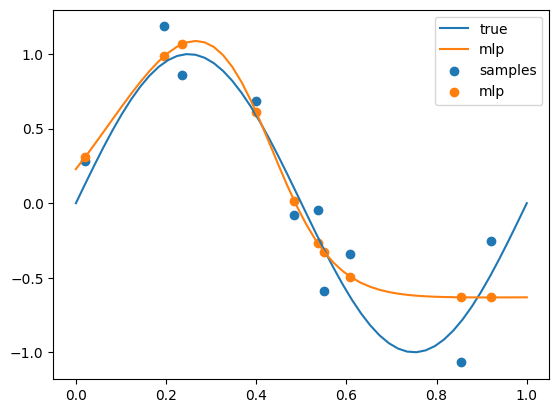

In [29]:
class MLP():
    def __init__(self, x, yt):
        self.x = x
        self.yt = yt
        self.w1, self.w2, self.b1, self.b2 = initWeights2()
        
    def iterate(self, lr=0.7):
        h0,h1,h2,f0,f1,self.y = forward(self.x, self.w1, self.w2, self.b1, self.b2)

        eprime = outputErrorPrime(self.y, self.yt)
        
        delta1, delta2 = localErrors(h1, self.w2)
        gradient_w1, gradient_w2, gradient_b1, gradient_b2 = gradients(self.y,self.yt,delta1,delta2,f0,f1)
    
        self.w1, self.w2, self.b1, self.b2 = update_weights(w1,w2,b1,b2,gradient_w1,gradient_w2,gradient_b1,gradient_b2,lr)
        
    def getOutput(self, x):
        _,_,_,_,_,y = forward(x, self.w1, self.w2, self.b1, self.b2)
        return y
     
    def getError(self):
        return outputError(self.y, self.yt).sum()
        
def plotresult(mlp, x, yt):
    xspace = np.linspace(0, 1, 50, endpoint=True)
    yspace = np.sin(2 * np.pi * xspace)
    
    ymlp = mlp.getOutput(x)
            
    xmlpspace = xspace[:, np.newaxis]
    xmlpspace = np.block([xmlpspace, np.zeros(len(xmlpspace)*2).reshape(-1,2)]) 
    ymlpspace = mlp.getOutput(xmlpspace)
    
    plt.plot(xspace, yspace, label='true')
    plt.plot(xspace, ymlpspace[:,0], label='mlp')
    
    plt.scatter(x[:,0],yt[:,0], marker='o', label='samples')
    plt.scatter(x[:,0],ymlp[:,0], marker='o', label='mlp')
    plt.legend()
    plt.show()

def results():
   
    x = getX2()
    yt = getY2()
    mlp = MLP(x, yt)
    
    for i in range(2000):
        mlp.iterate(0.7)
        
        if(i%100 == 0):
            print(f'Iteration {i}: {mlp.getError()}')
#             plotresult(mlp, x, yt)
    plotresult(mlp, x, yt)
results() 

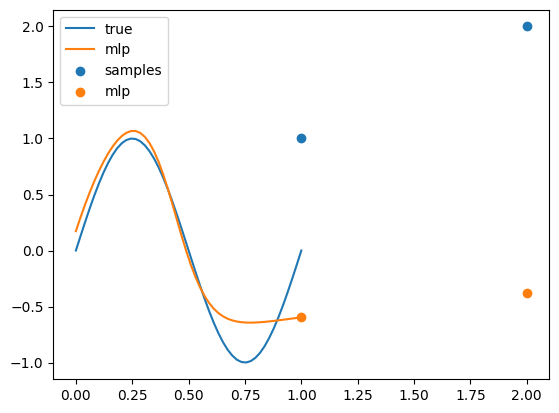

In [15]:
def results(x,yt):
    xspace = np.linspace(0, 1, 50, endpoint=True)
    yspace = np.sin(2 * np.pi * xspace)
    
    my_mlp = mlp(0.7, 10000)
    _,_,_,_,_,ymlp = forward(x,*my_mlp)
    
    xmlpspace = xspace[:, np.newaxis]
    xmlpspace = np.block([xmlpspace, np.zeros(len(xmlpspace)*2).reshape(-1,2)]) 
    _,_,_,_,_,ymlpspace = forward(xmlpspace,*my_mlp)
    
    
    plt.plot(xspace, yspace, label='true')
    plt.plot(xspace, ymlpspace[:,0], label='mlp')
    
    plt.scatter(x[:,0],yt[:,0], marker='o', label='samples')
    plt.scatter(x[:,0],ymlp[:,0], marker='o', label='mlp')
    plt.legend()

results(x,yt)